#Mobile Price Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
font = {'size'   : 14}
plt.rc('font', **font)
warnings.filterwarnings("ignore")

In [3]:
# Import Dataset
data = pd.read_csv("/content/drive/MyDrive/contents/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/contents/test.csv")
x = data.iloc[:,0:20]
y = data.iloc[:,20]
pd.set_option('display.max_columns', None)

In [4]:
#Inspecting the training Dataset
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Inspecting the Test Dataset
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


#### Here are attributes of our dataset:
1. id: ID
2. battery_power: Total energy a battery can store in one time measured in mAh
3. blue: Has bluetooth or not
4. clock_speed: speed at which microprocessor executes instructions
5. dual_sim: Has dual sim support or not
6. fc: Front Camera mega pixels
7. four_g: Has 4G or not
8. int_memory: Internal Memory in Gigabytes
9. m_dep: Mobile Depth in cm
10. mobile_wt: Weight of mobile phone
11. n_cores: Number of cores of processor
12. pc: Primary Camera mega pixels
13. px_height: Pixel Resolution Height
14. px_width: Pixel Resolution Width
15. ram: Random Access Memory in Megabytes
16. sc_h: Screen Height of mobile in cm
17. sc_w: Screen Width of mobile in cm
18. talk_time: longest time that a single battery charge will last when you are
19. three_g: Has 3G or not
20. touch_screen: Has touch screen or not
21. wifi: Has wifi or not
22. price_range: This is the target variable with value of
     1. 0 (low cost),
     2. 1 (budgeted),
     3. 2 (medium cost)
     4. 3 (flagship)

### Data Preprocessing


In [6]:
#Checking the missing values in our dataset if any
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
data.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  


Text(0.5, 1.0, 'Correlation of Attirubtues')

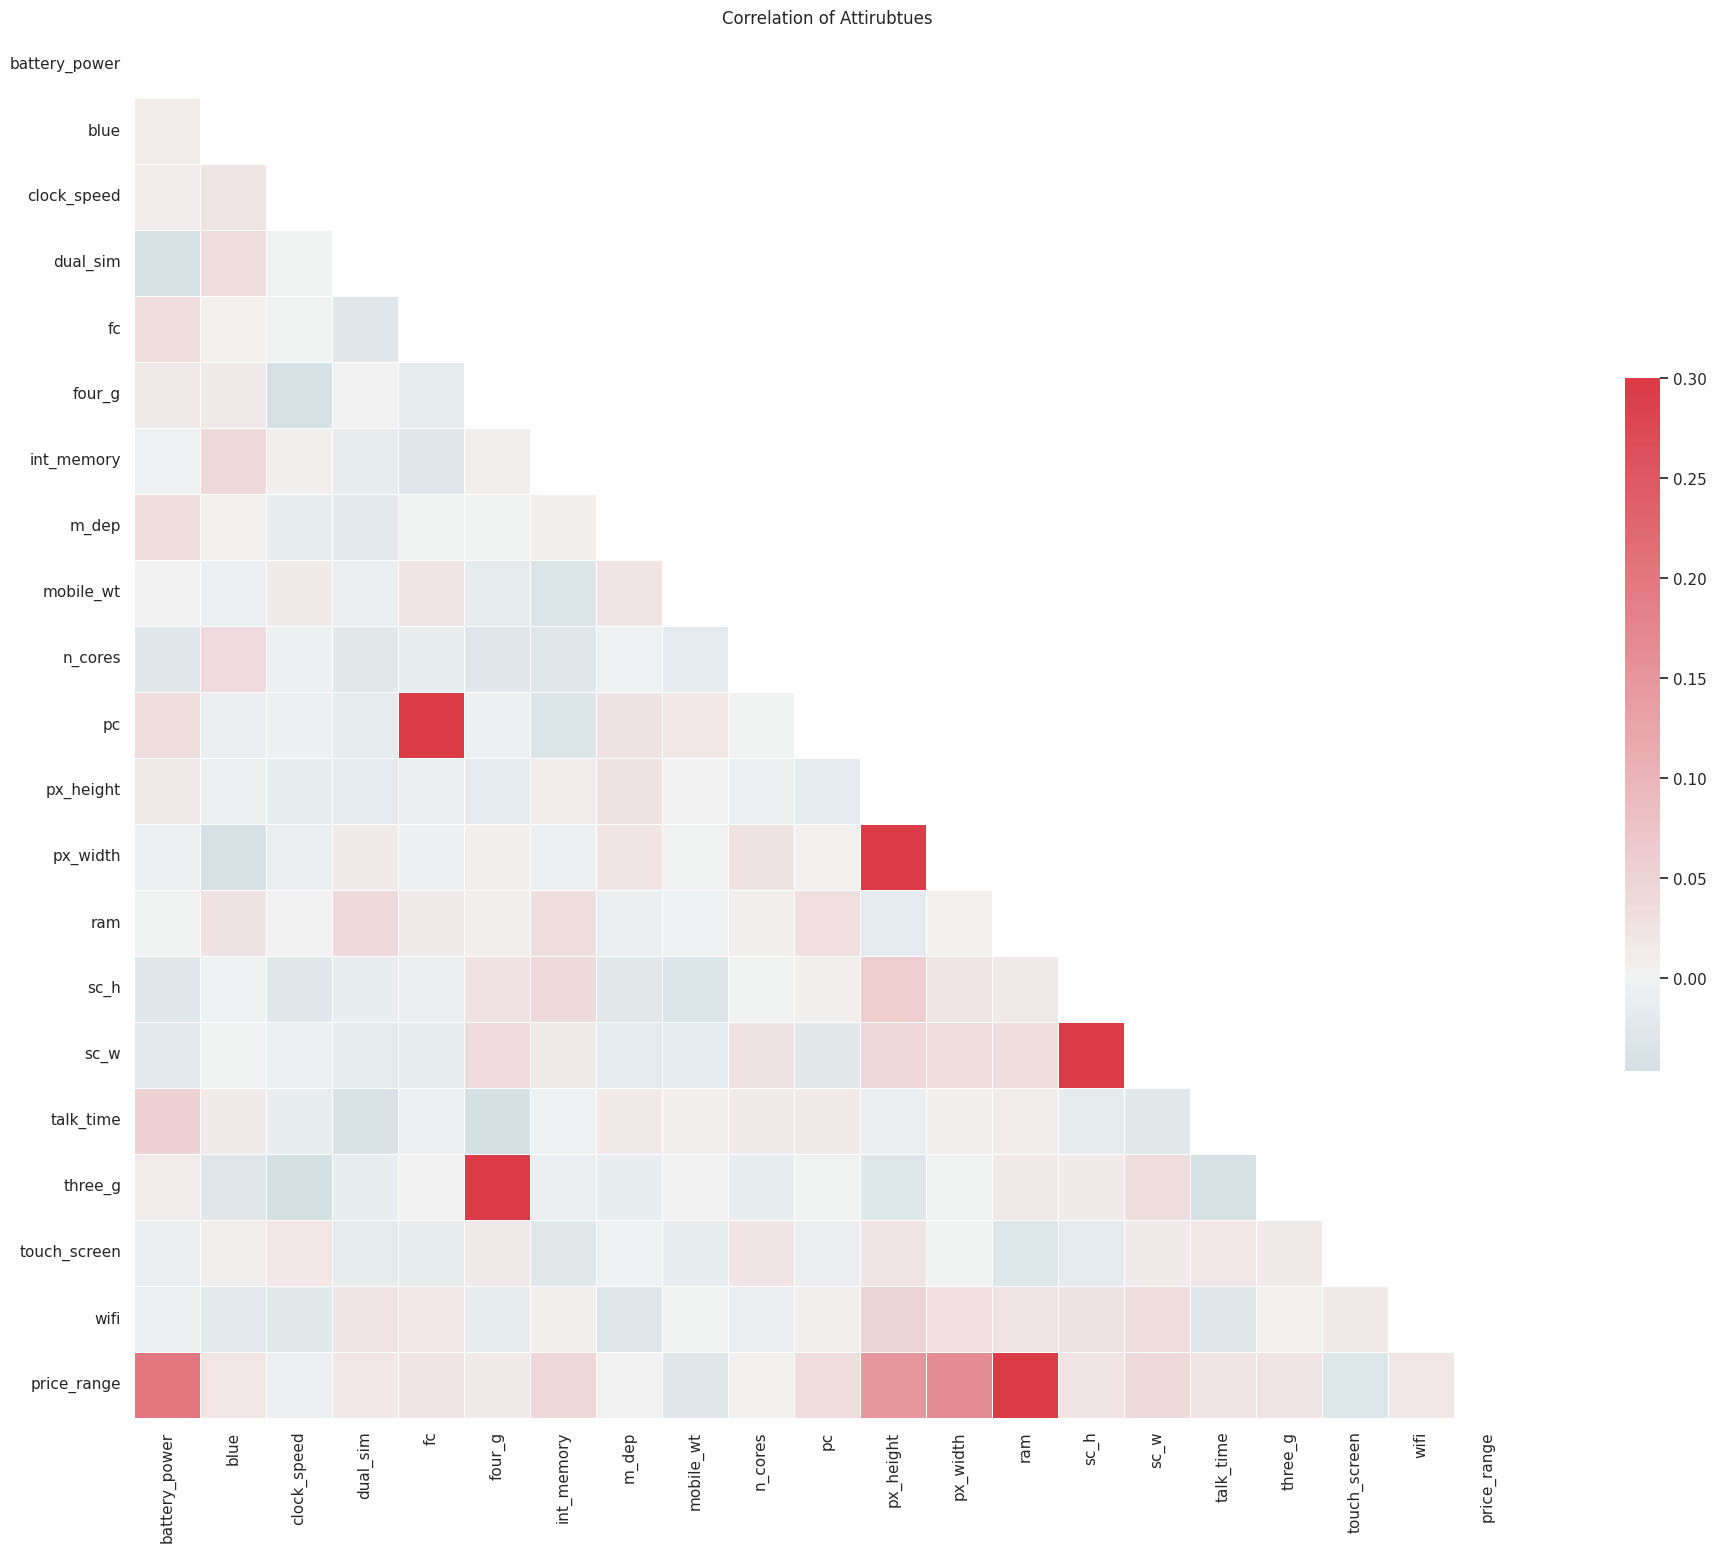

In [8]:
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

#### Here, we can see that the following have high correlation with each other

1. pc and fc
2. three_g and four_g
3. px_width and px_height

------------>Outlier Analysis of Non-Categorical Data<------------



<Axes: xlabel='talk_time'>

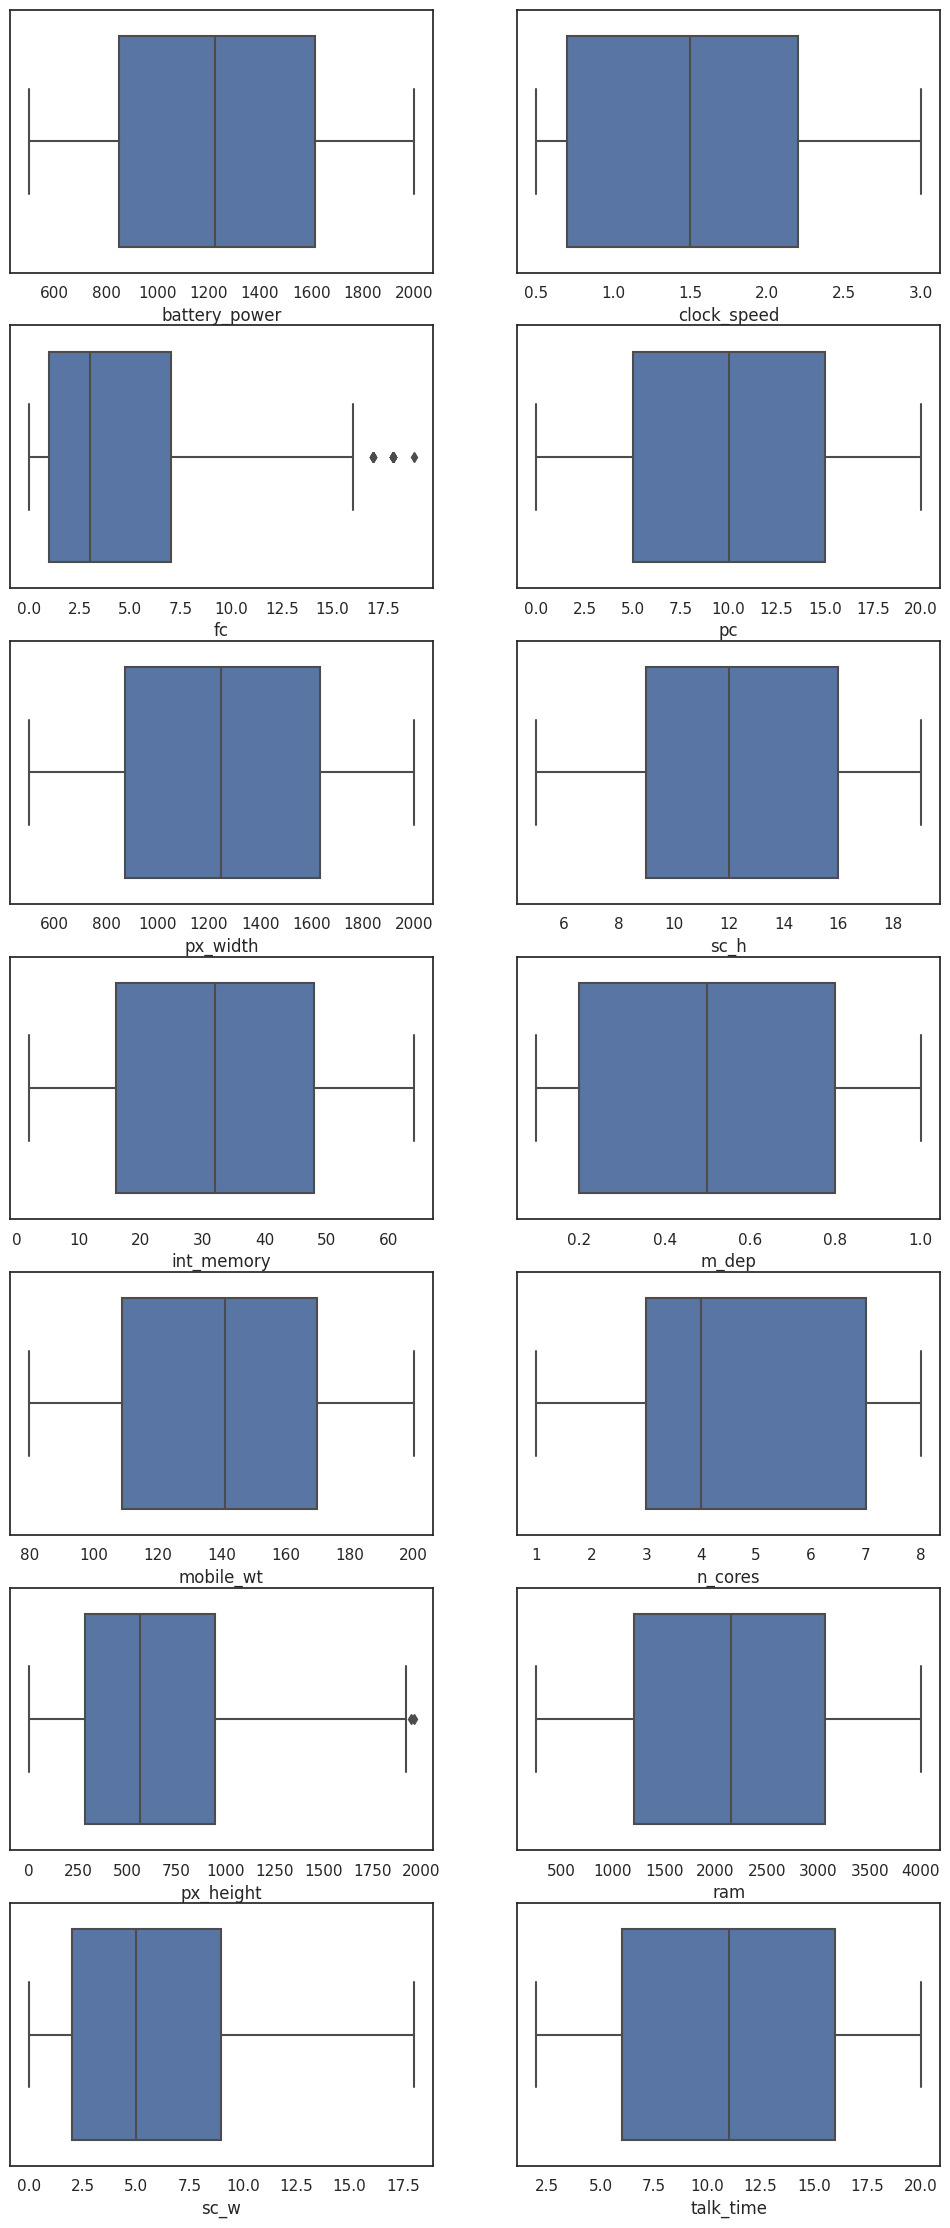

In [9]:
print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=data['battery_power'],ax=ax[0,0])
sns.boxplot(x=data['clock_speed'],ax=ax[0,1])
sns.boxplot(x=data['fc'],ax=ax[1,0])
sns.boxplot(x=data['pc'],ax=ax[1,1])
sns.boxplot(x=data['px_width'],ax=ax[2,0])
sns.boxplot(x=data['sc_h'],ax=ax[2,1])
sns.boxplot(x=data['int_memory'],ax=ax[3,0])
sns.boxplot(x=data['m_dep'],ax=ax[3,1])
sns.boxplot(x=data['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=data['n_cores'],ax=ax[4,1])
sns.boxplot(x=data['px_height'],ax=ax[5,0])
sns.boxplot(x=data['ram'],ax=ax[5,1])
sns.boxplot(x=data['sc_w'],ax=ax[6,0])
sns.boxplot(x=data['talk_time'],ax=ax[6,1])

#### There are a few outliers in fc and px_height only.


Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

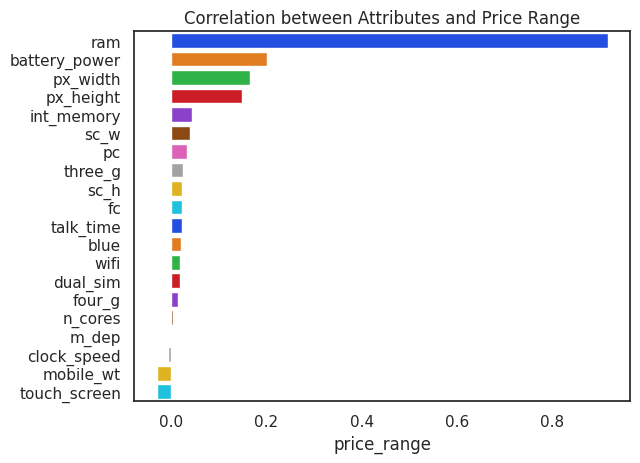

In [10]:
#we are not considering the correlations between X features among themselves
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



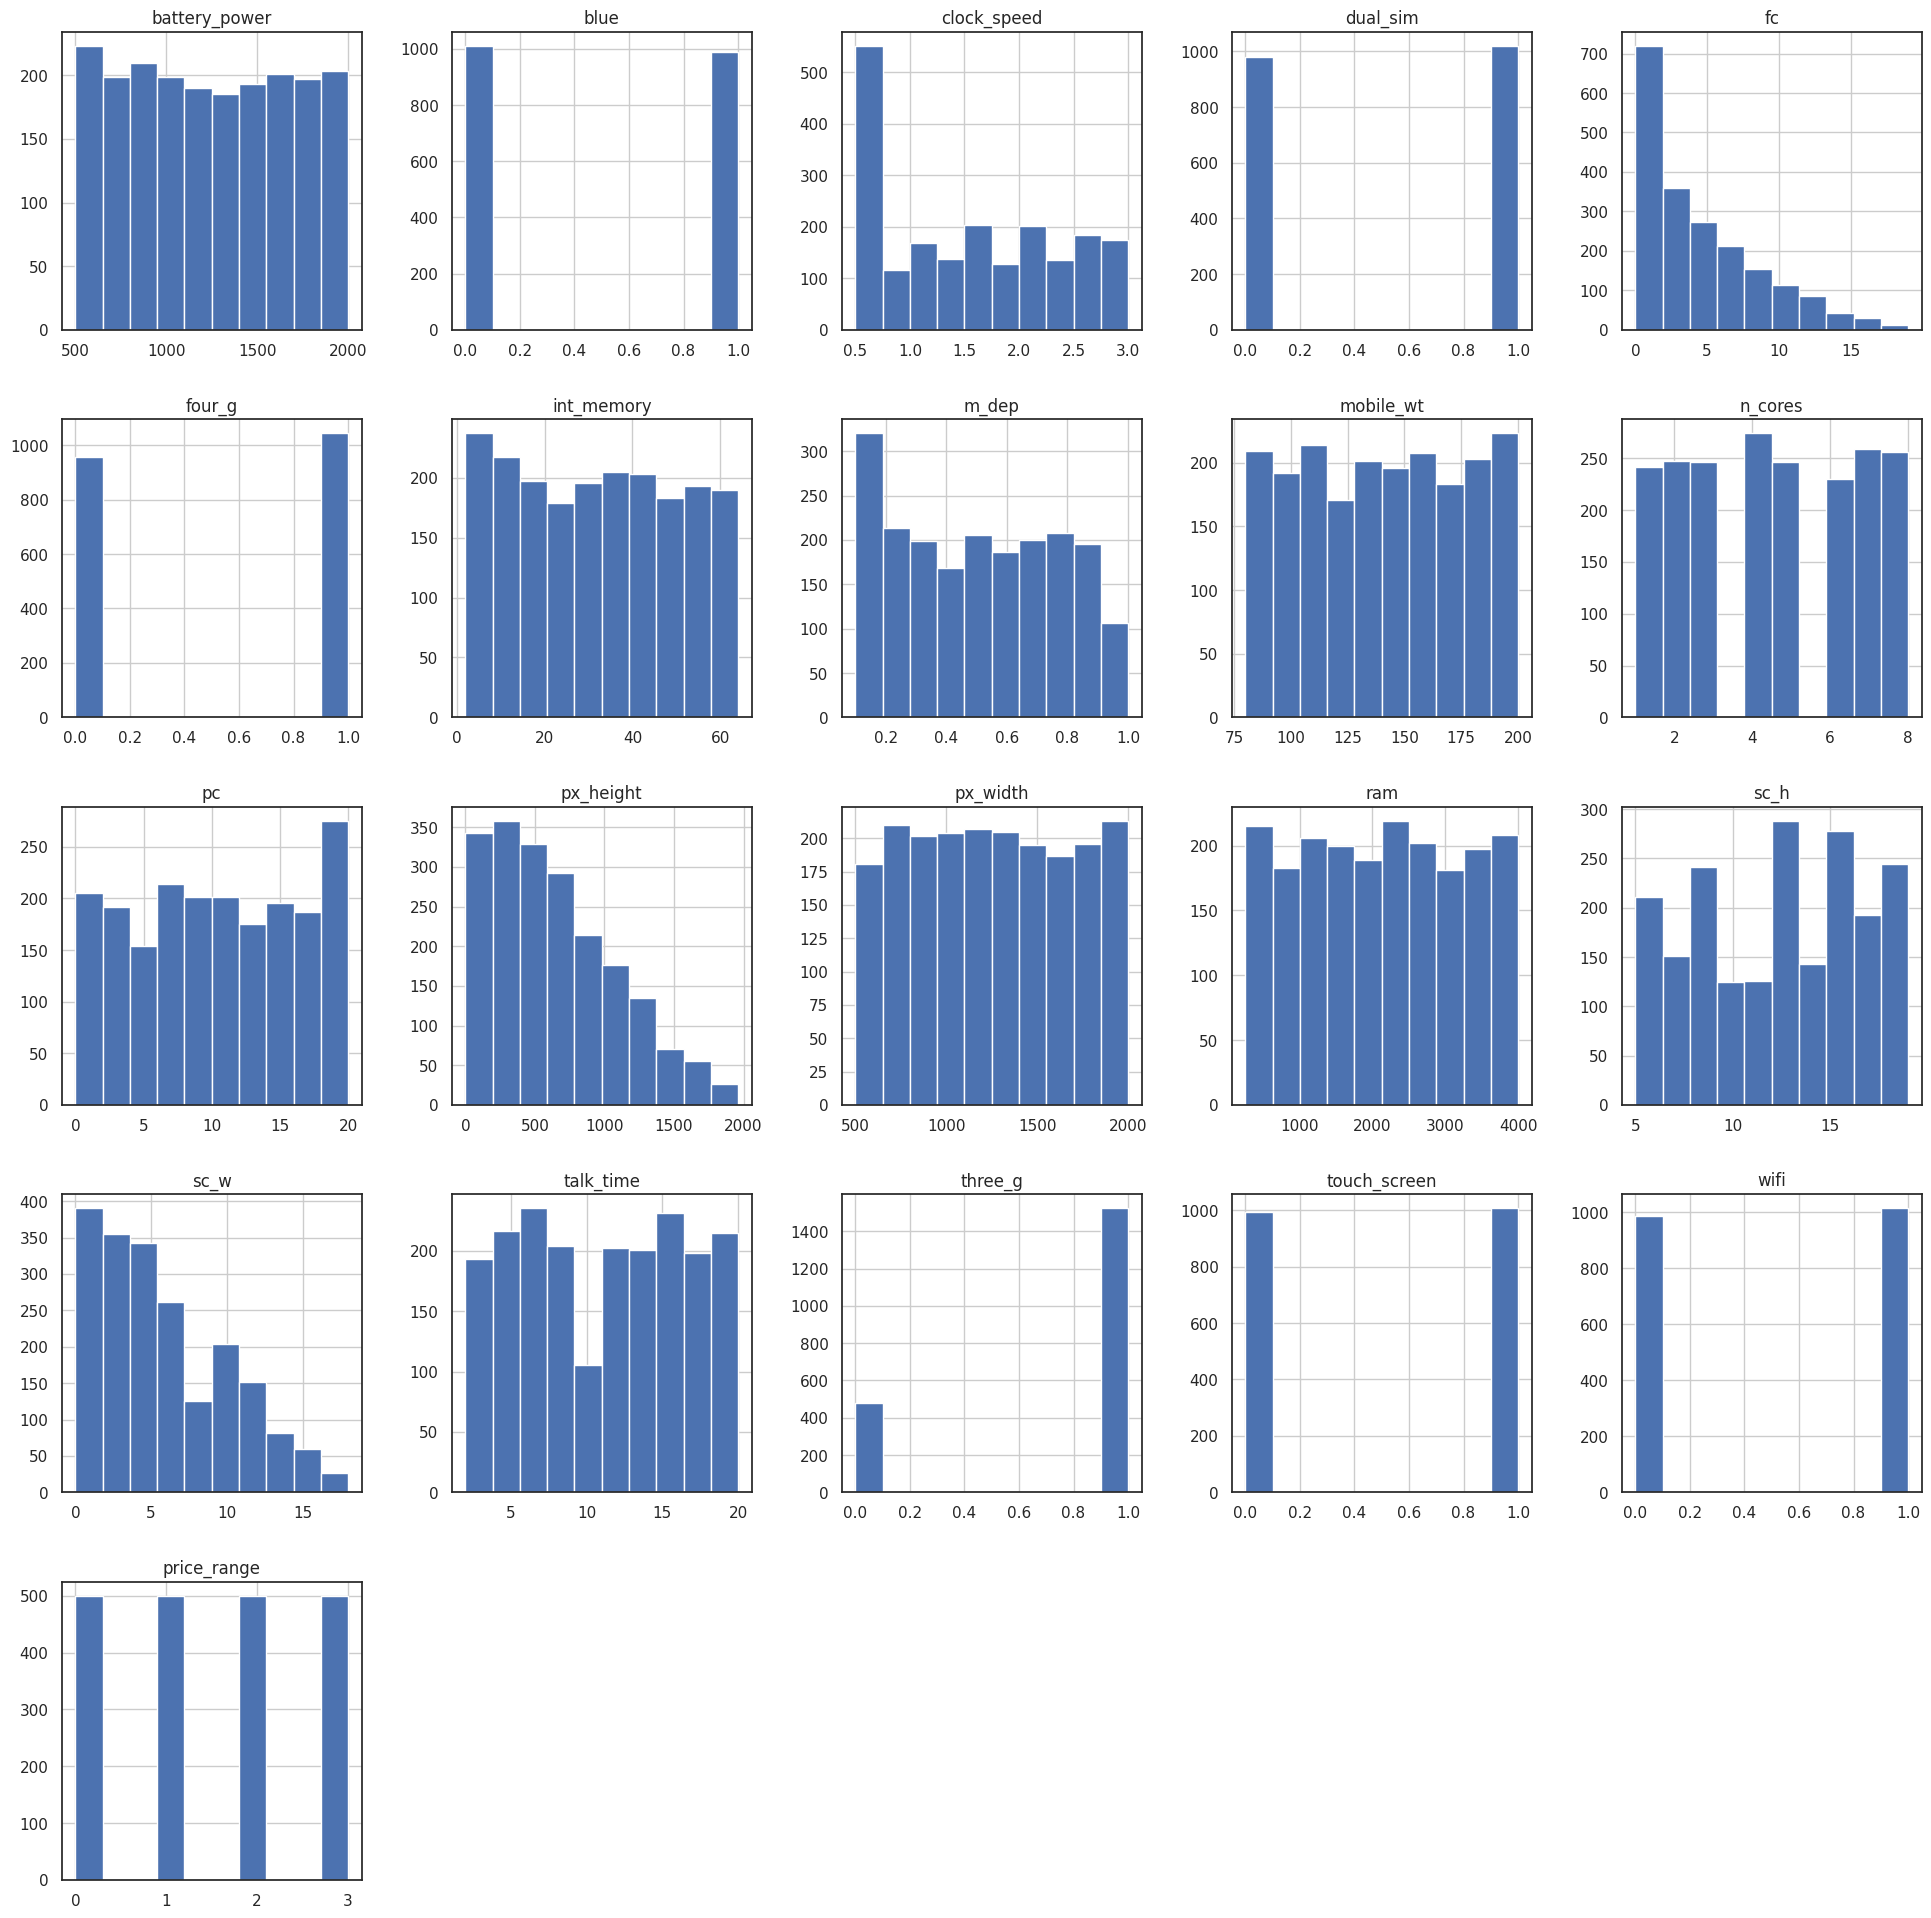

In [11]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
data.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

In [13]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = data.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

#### Implementation of Machine Learning Alogorithms

##### To predict the mobile phone price, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

1. Logistic regression
2. Decision tree(gini)
3. Decision tree(entropy)
4. Random forest
5. KNN
6. Naive Bayes
7. SVM
8. GBC
9. XGB


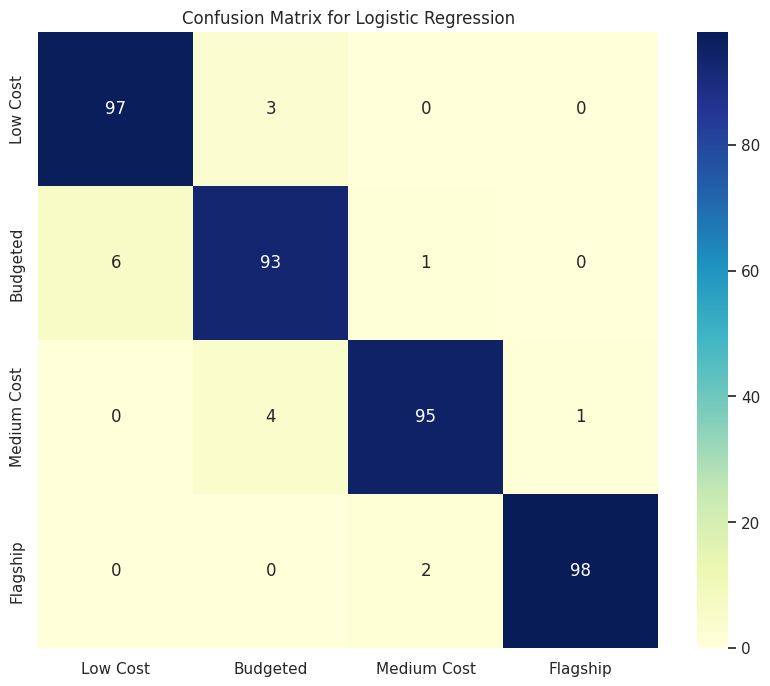

Text(0.5, 1.0, 'Visualizing Important Features for Logistic Regression')

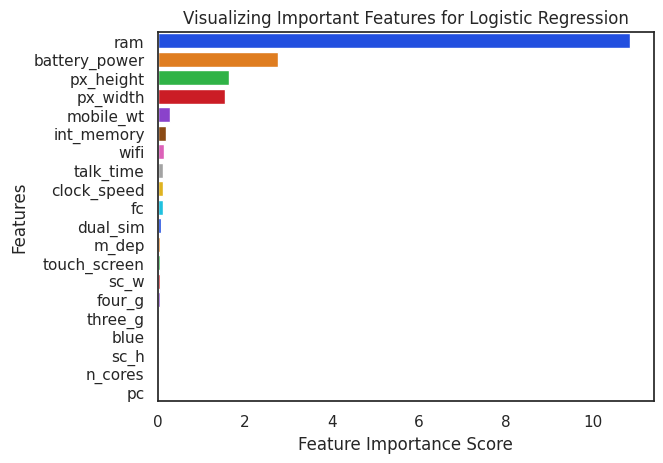

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_lr)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
#Calculate Accuracy
acc_lr = accuracy_score(y_valid, y_pred_lr)
#Features Contribution
feature_imp = pd.Series(abs(lr.coef_[0]), index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette="bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Logistic Regression")

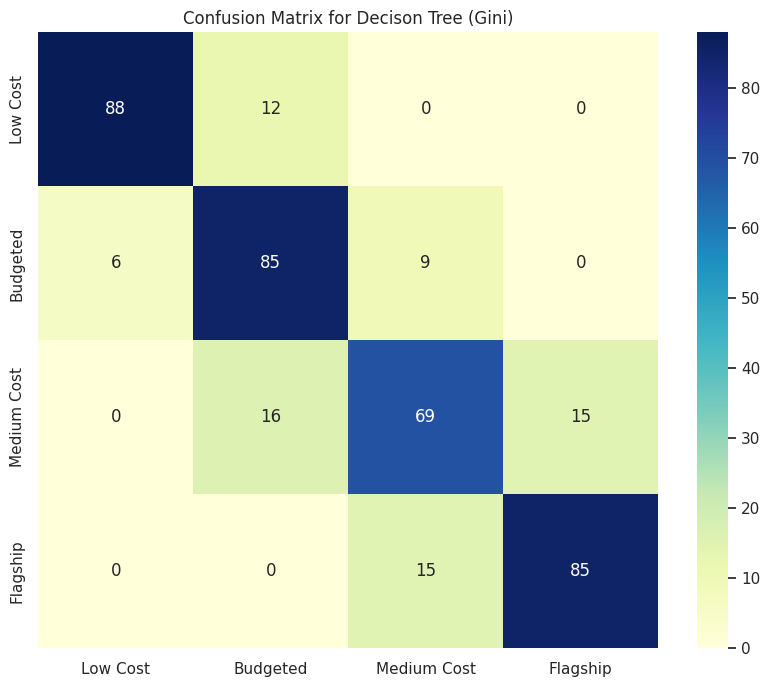

Text(0.5, 1.0, 'Visualizing Important Features for Decision Tree(Gini)')

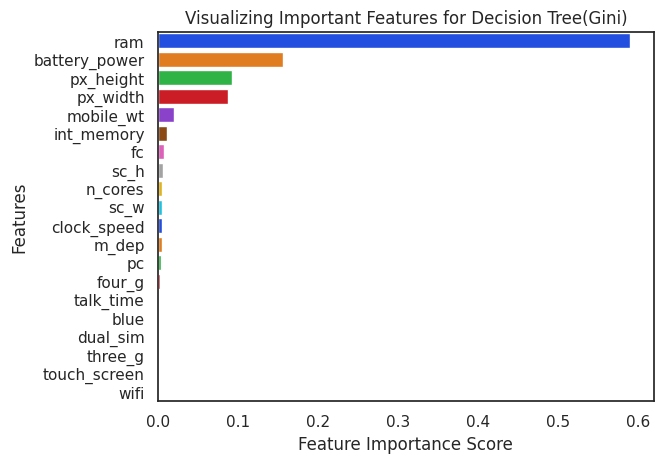

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(random_state=101)
dtg.fit(x_train, y_train)
y_pred_dtg = dtg.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dtg)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Decison Tree (Gini)")
plt.show()
#Calculate Accuracy
acc_dtg = accuracy_score(y_valid, y_pred_dtg)
#Features Contribution
feature_imp = pd.Series(dtg.feature_importances_, index = col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Decision Tree(Gini)")

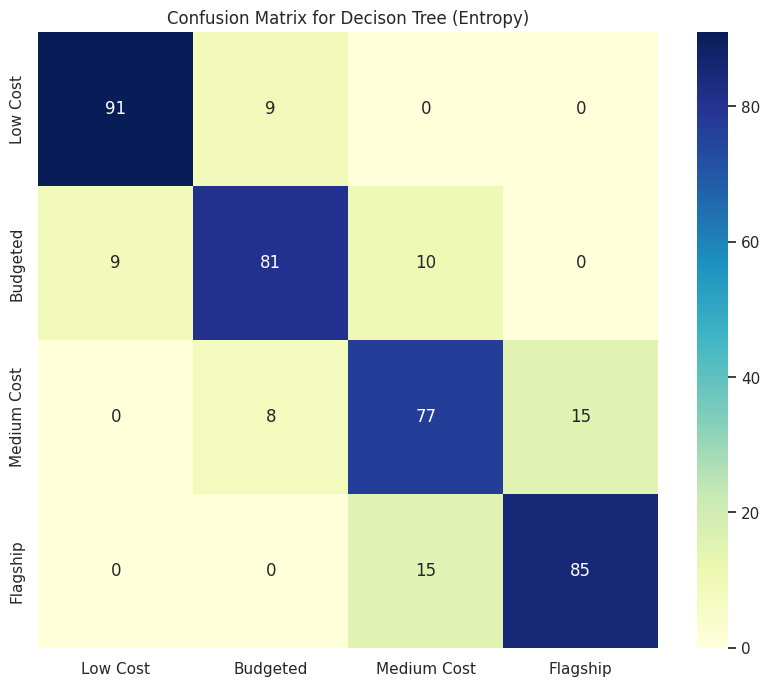

Text(0.5, 1.0, 'Visualizing Important Features for Decision Tree(Entropy)')

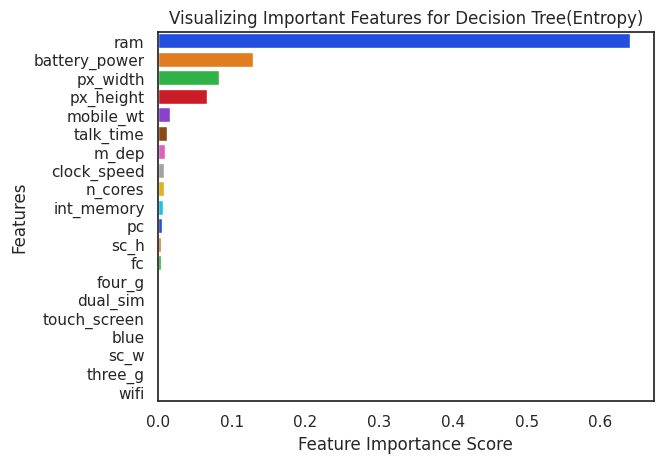

In [16]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion= "entropy",random_state=101)
dte.fit(x_train, y_train)
y_pred_dte = dte.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dte)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Decison Tree (Entropy)")
plt.show()
#Calculate Accuracy
acc_dte = accuracy_score(y_valid, y_pred_dte)
#Features Contribution
feature_imp= pd.Series(dte.feature_importances_ , index =col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Decision Tree(Entropy)")

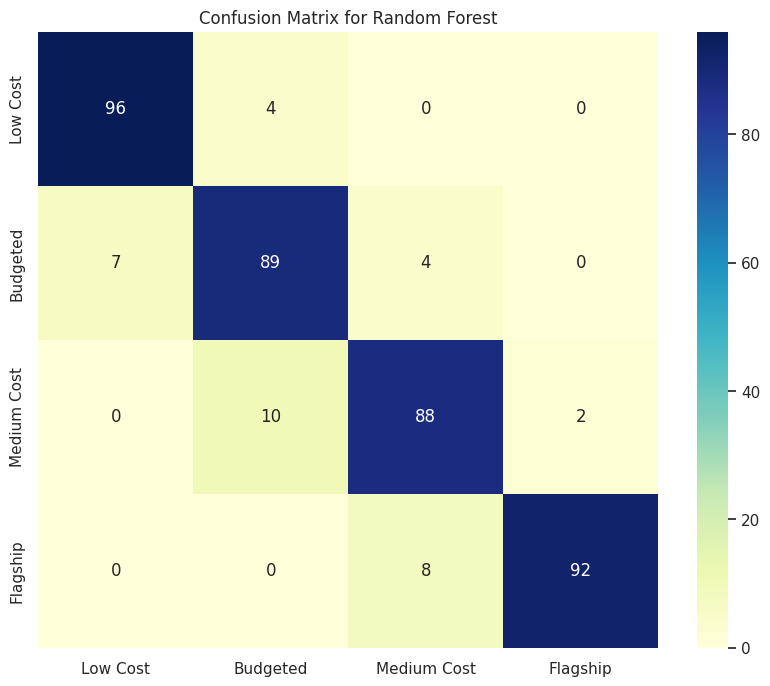

Text(0.5, 1.0, 'Visualizing Important Features for Random Forest')

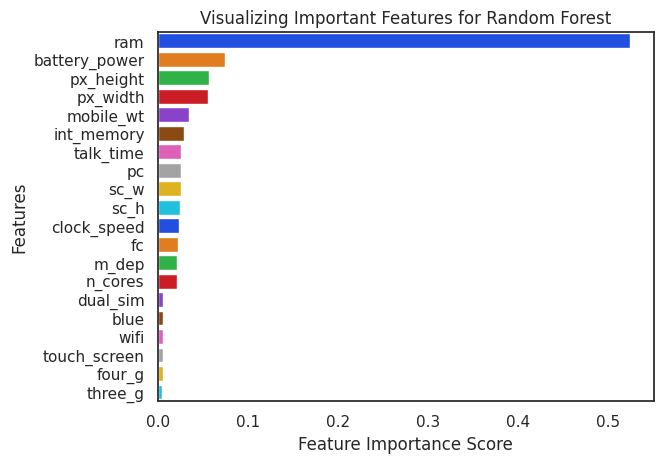

In [17]:
# ------------->RANDOM FOREST<------------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_rf)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Random Forest")
plt.show()
#Calculate Accuracy
acc_rf = accuracy_score(y_valid, y_pred_rf)
#Features Contribution
feature_imp = pd.Series(rf.feature_importances_,index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest")

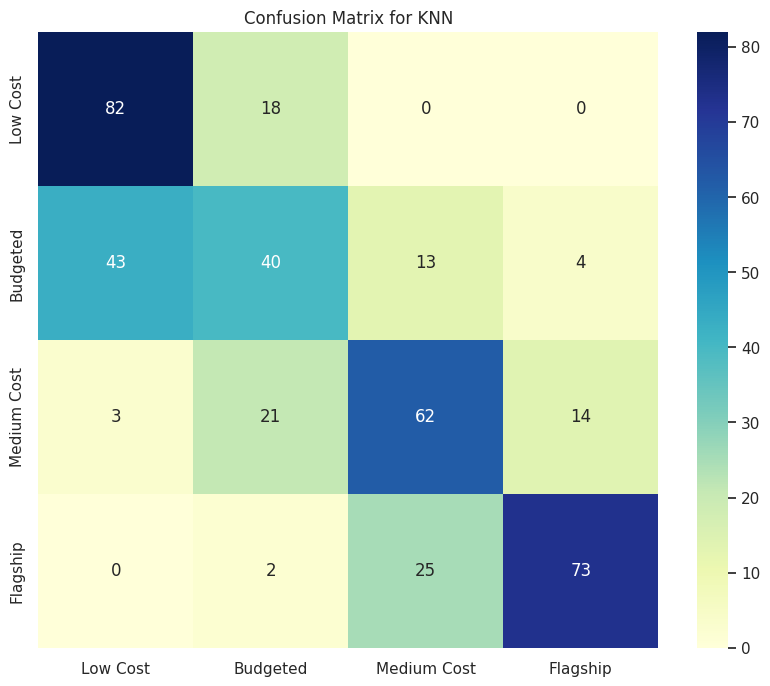

In [18]:
# ------------->K NEAREST NEIGHBOR<-------------
from sklearn.neighbors import KNeighborsClassifier
# Finding optimal KNN Grid Search Method
from sklearn.model_selection import GridSearchCV
# parameters = {'n_neighbors':np.arange(1,50)}
# knn = KNeighborsClassifier()
# model = GridSearchCV(knn, parameters, cv=5)
# model.fit(x_train, y_train)
# print(model.best_params_)
#Printing optimal n-neighbors
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_knn)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for KNN")
plt.show()
#Calculate Accuracy
acc_knn = accuracy_score(y_valid, y_pred_knn)

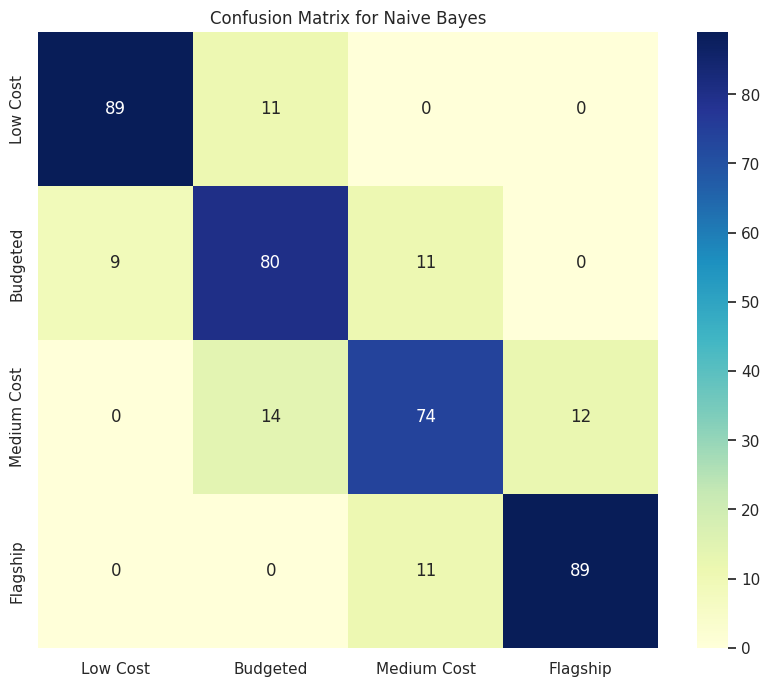

In [19]:
#------------->NAIVE BAYES<-------------
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_nb)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
#Calculate Accuracy
acc_nb = accuracy_score(y_valid, y_pred_nb)

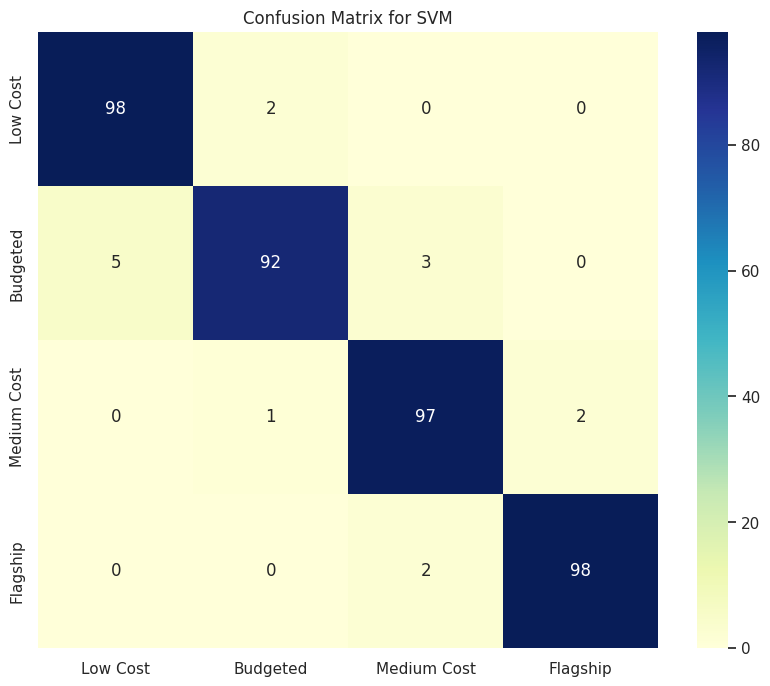

Text(0.5, 1.0, 'Visualizing Important Features for SVM')

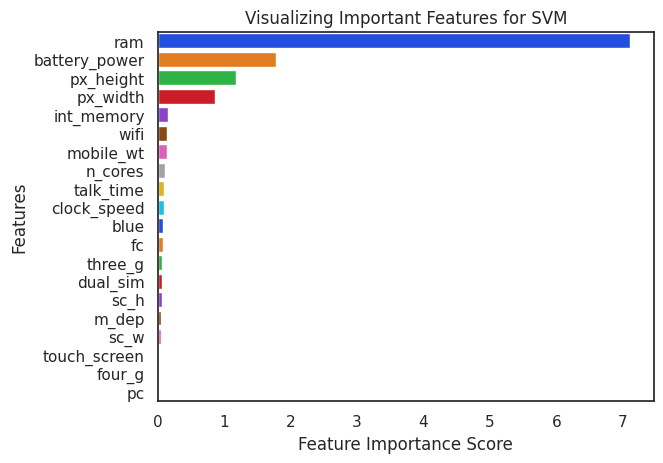

In [20]:
#------------->SVM<-------------
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',random_state = 0)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_svm)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for SVM")
plt.show()
#Calculate Accuracy
acc_svm = accuracy_score(y_valid, y_pred_svm)
#Features Contribution
feature_imp = pd.Series(abs(svm.coef_[0]), index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for SVM")

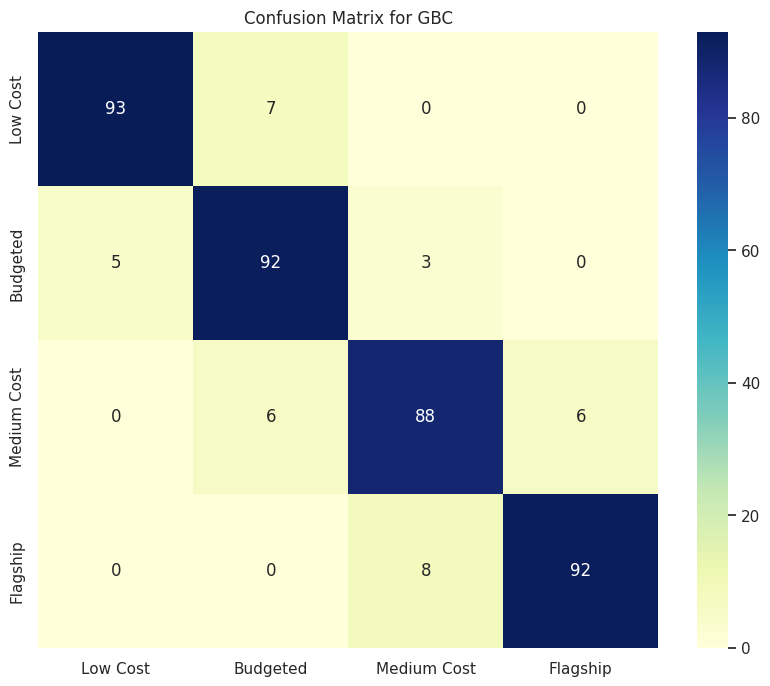

Text(0.5, 1.0, 'Visualizing Important Features for GBC')

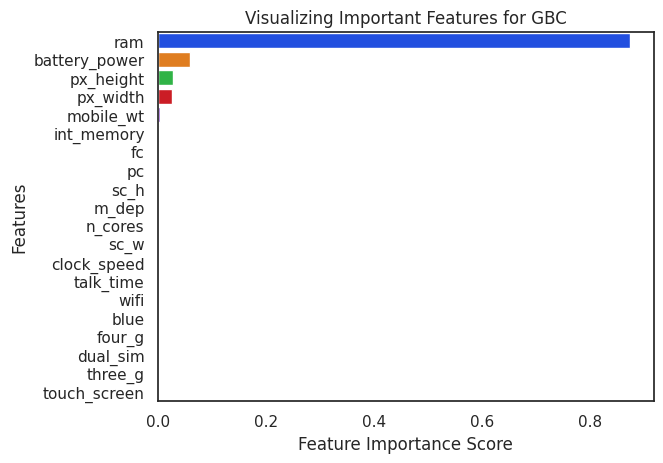

In [21]:
#------------->GBC<-------------
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train,y_train)
y_pred_gbc = gbc.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_gbc)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for GBC")
plt.show()
#Calculate Accuracy
acc_gbc = accuracy_score(y_valid, y_pred_gbc)
#Features Contribution
feature_imp = pd.Series(gbc.feature_importances_ , index = col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for GBC")

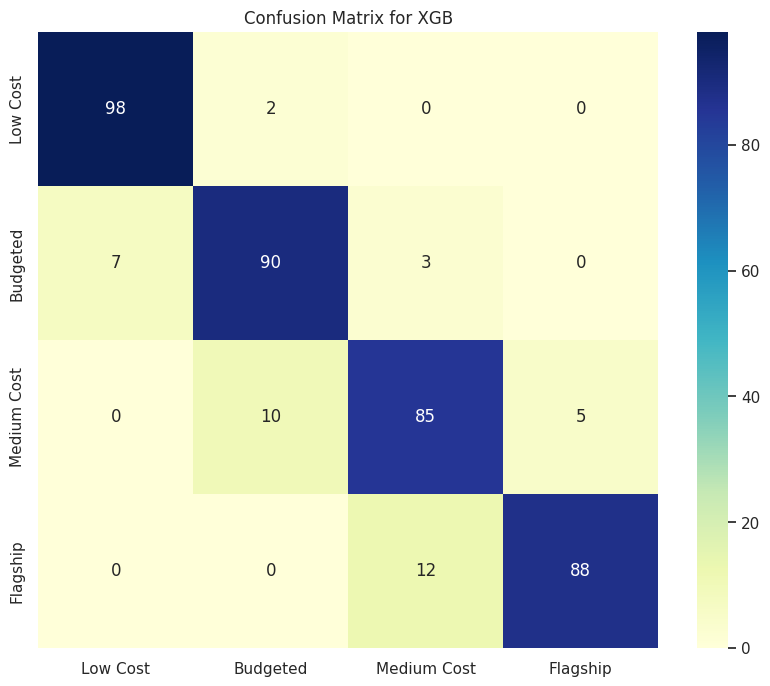

Text(0.5, 1.0, 'Visualizing Important Features for XGB')

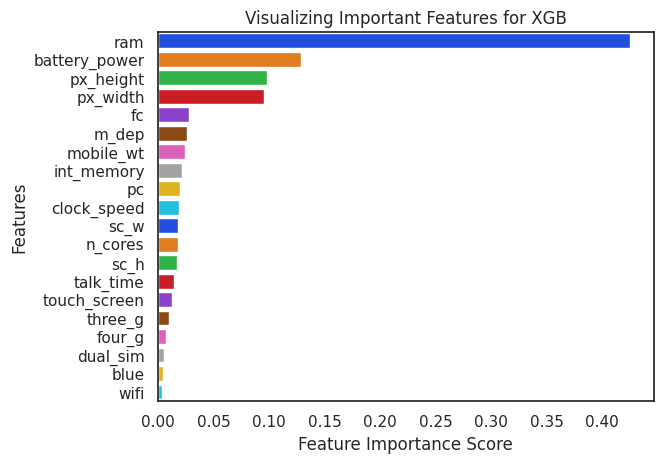

In [22]:
#------------->XGB<-------------
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb=xgb.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_xgb)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for XGB")
plt.show()
#Calculate Accuracy
acc_xgb = accuracy_score(y_valid, y_pred_xgb)
#Features Contribution
feature_imp = pd.Series(xgb.feature_importances_ , index = col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for XGB")

In [24]:
#------------>Accuracy Comparison<------------
models = ['LR','DTG','DTE','RF','KNN','NB','SVM','GBC','XGB']
acc_scores = [acc_lr,acc_dtg,acc_dte,acc_rf,acc_knn,acc_nb,acc_svm,acc_gbc,acc_xgb]
print("Models\tAccuracy\n")
for i in range(9):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')

Models	Accuracy

LR	0.9575
DTG	0.8175
DTE	0.835
RF	0.9125
KNN	0.6425
NB	0.83
SVM	0.9625
GBC	0.9125
XGB	0.9025



------------>We decide from the Bar Graph that the best Model is SVM<------------


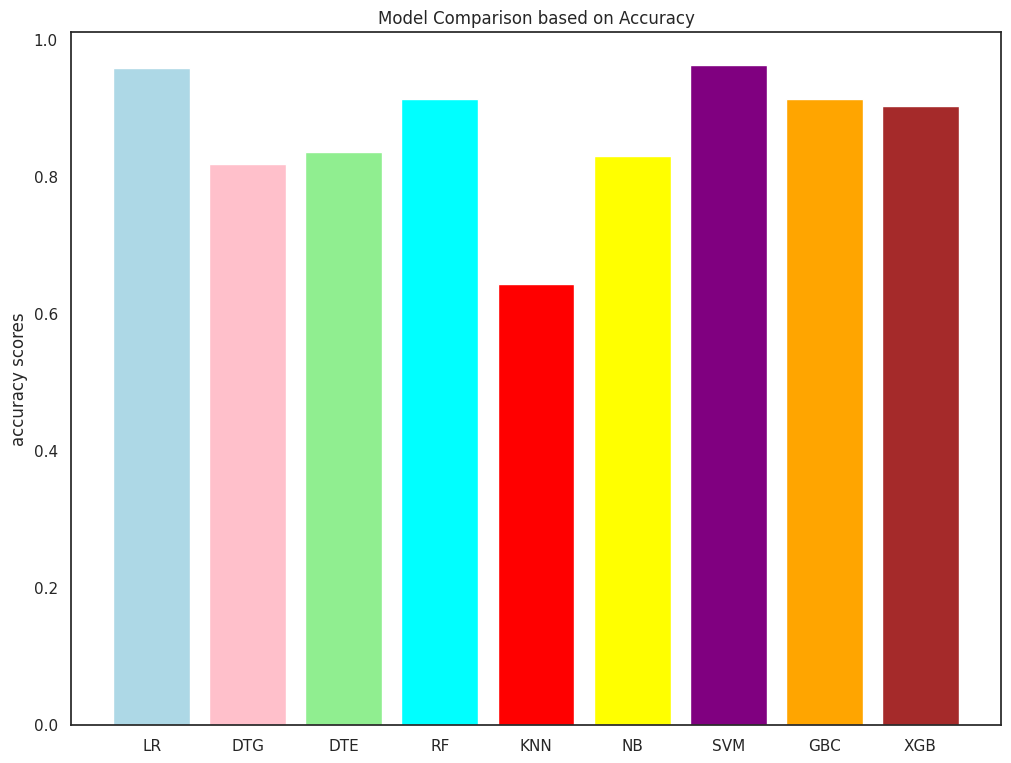

In [25]:
#------------>Finding the Best Algorithm<----------

print("\n------------>We decide from the Bar Graph that the best Model is SVM<------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

------->EDA for Best 8 Features for SVM<-------


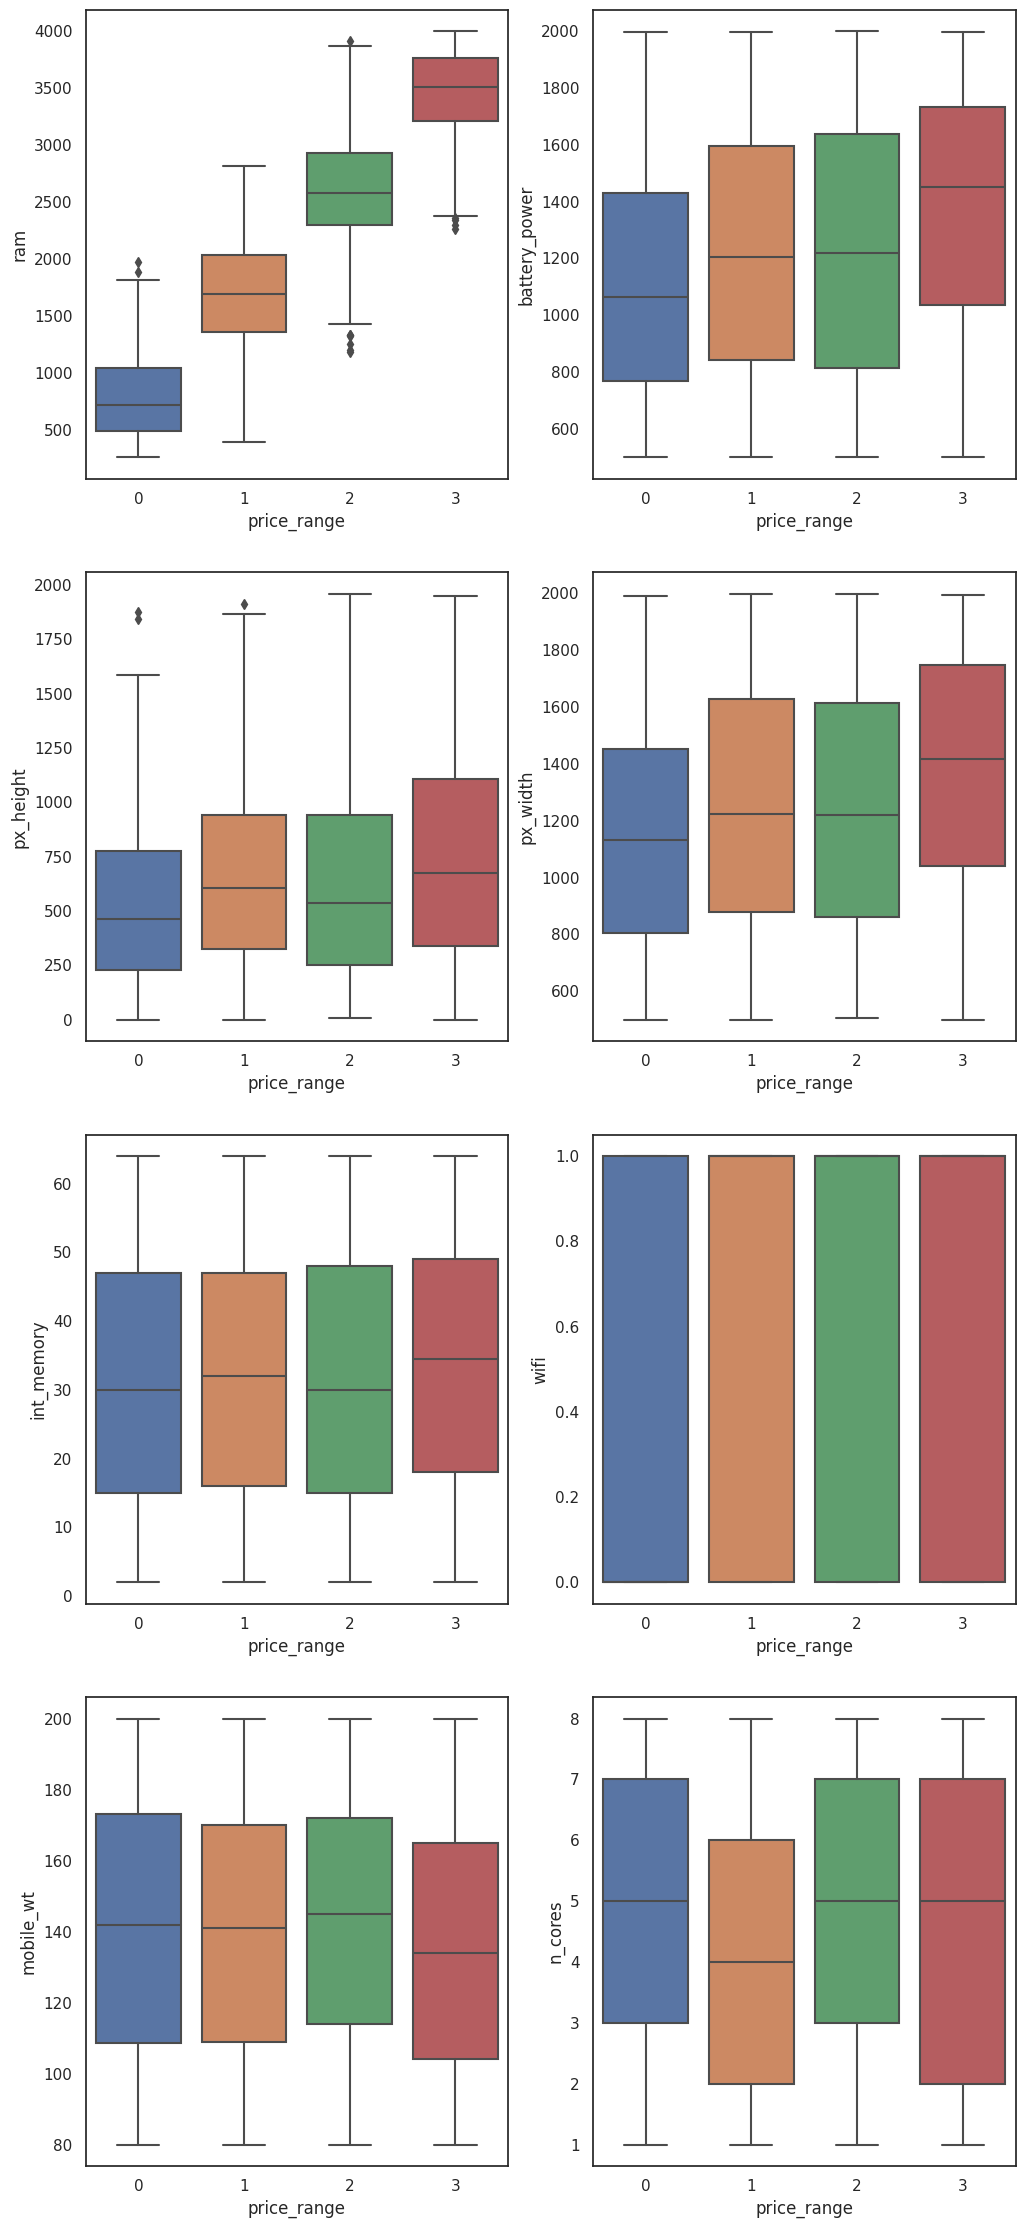

In [26]:
#EDA for the best 8 features that we saw on SVM
print("------->EDA for Best 8 Features for SVM<-------")
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=data,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=data,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_height',data=data,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_width',data=data,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=data,ax=ax[2,0]);
sns.boxplot(x='price_range',y='wifi',data=data,ax=ax[2,1]);
sns.boxplot(x='price_range',y='mobile_wt',data=data,ax=ax[3,0]);
sns.boxplot(x='price_range',y='n_cores',data=data,ax=ax[3,1]);

In [27]:
#------------>Using the Best Algorithm<-------------
# Remove ID column(extra)
test_data=test_data.drop('id',axis=1)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test = sc.fit_transform(test_data)

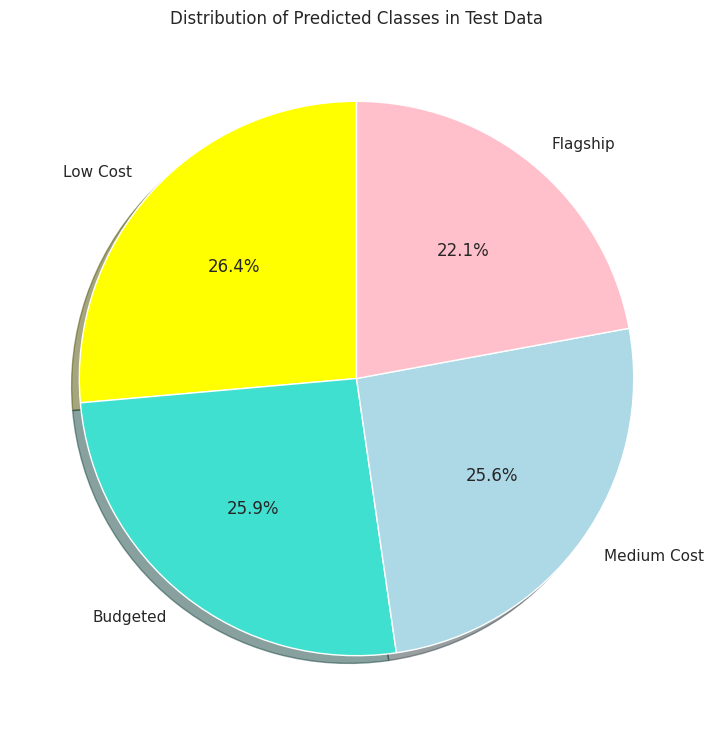

In [28]:
# Prediction
predicted_price_range = svm.predict(test)

test_data['price_range'] = predicted_price_range

labels = ["Low Cost", "Budgeted", "Medium Cost", "Flagship"]
labels = list(labels)
values = test_data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
plt.rcParams['figure.figsize'] = (12,9)
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Distribution of Predicted Classes in Test Data')
plt.show()

### Dimensionality Reduction
#### After appliying LDA we get maximum accuracy from Naive Bayes Algorithm

In [30]:
#------------->Applying LDA<-------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train,y_train)
x_valid = lda.transform(x_valid)

#By runnning all the models we find the best accuracy for 2 Linear Discriminants is given by Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_valid)
#Calculate Accuracy
acc_nb = accuracy_score(y_valid, y_pred_nb)

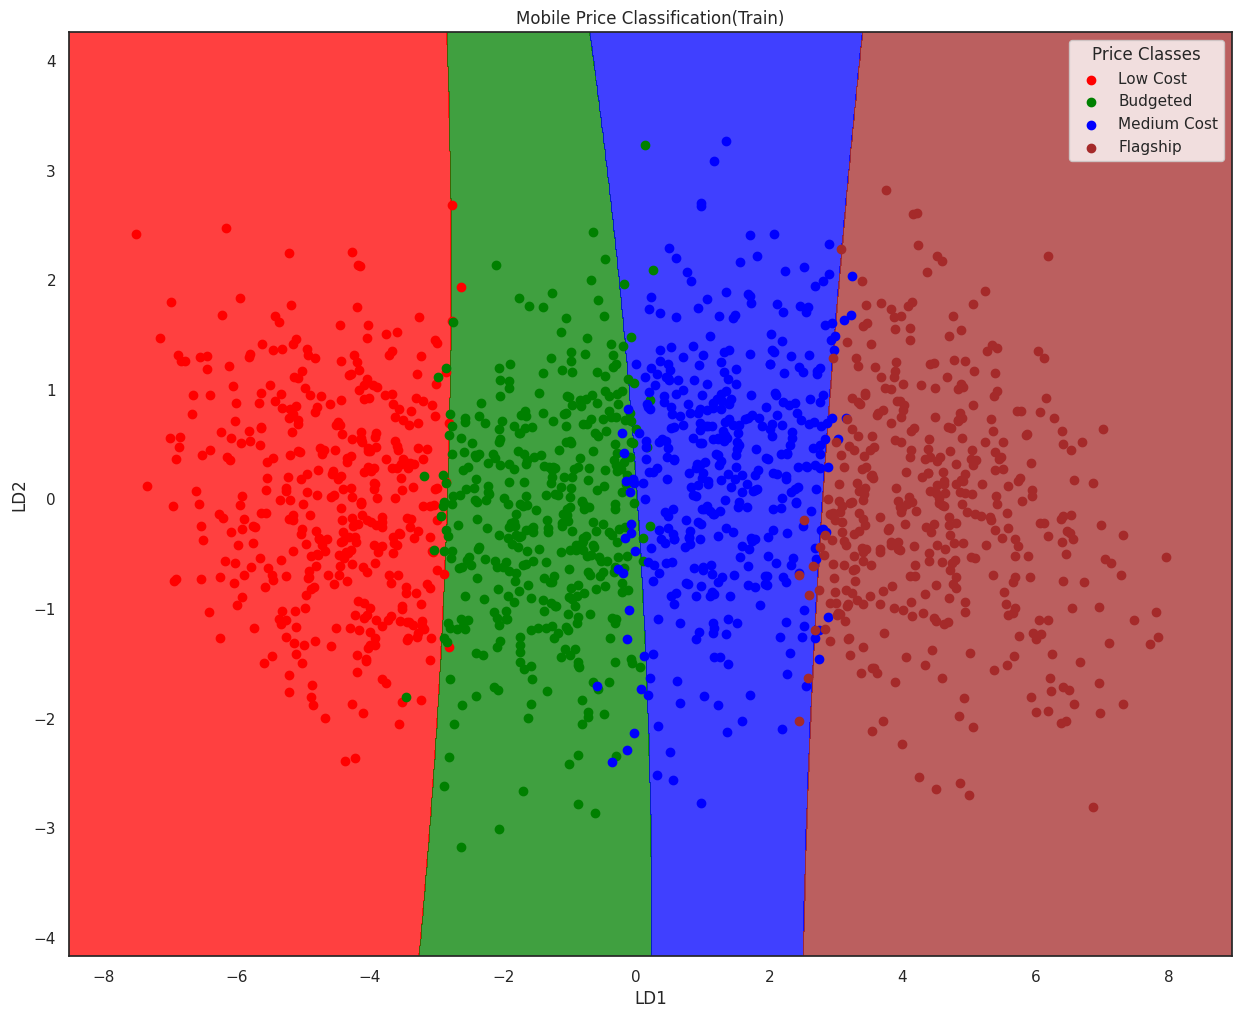

In [31]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
fig, ax = plt.subplots(figsize=(15,12))
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue','brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
classes = ['Low Cost', 'Budgeted', 'Medium Cost', 'Flagship']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue','brown'))(i), label = classes[j])
plt.title('Mobile Price Classification(Train)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title = "Price Classes")
plt.show()

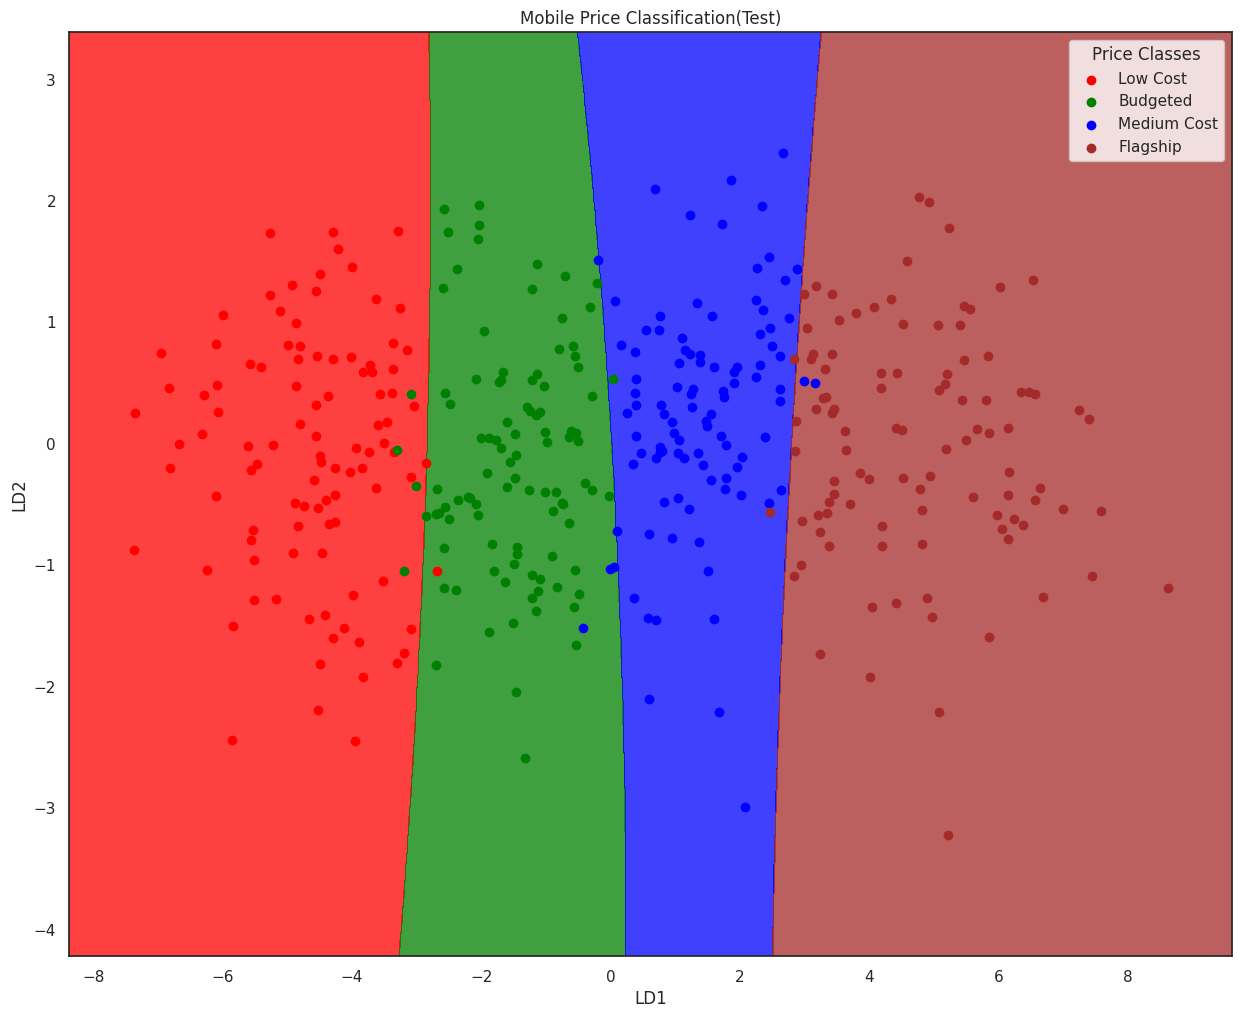

In [32]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
fig, ax = plt.subplots(figsize=(15,12))
X_set, y_set = x_valid, y_valid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue','brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
classes = ['Low Cost', 'Budgeted', 'Medium Cost', 'Flagship']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue','brown'))(i), label = classes[j])
plt.title('Mobile Price Classification(Test)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title = "Price Classes")
plt.show()
